<a href="https://colab.research.google.com/github/23-01-2004/Weather-App-/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
# Step 1: Upload the Dataset
uploaded = files.upload()

# Step 2: Load the Dataset
file_name = 'train.csv'  # Update if the uploaded file name is different
titanic_data = pd.read_csv(file_name)

Saving train.csv to train (1).csv


In [3]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Missing Values
print("Missing values before cleaning:")
print(titanic_data.isnull().sum())

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


In [7]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

#Cabin column dropped
titanic_data.drop(columns=['Cabin'], inplace=True)

In [9]:
#Verification
print("Missing values after cleaning:")
print(titanic_data.isnull().sum())

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
# Basic structure of the dataset
print("Dataset Info:")
print(titanic_data.info())
print("Dataset Description:")
print(titanic_data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
Dataset Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.

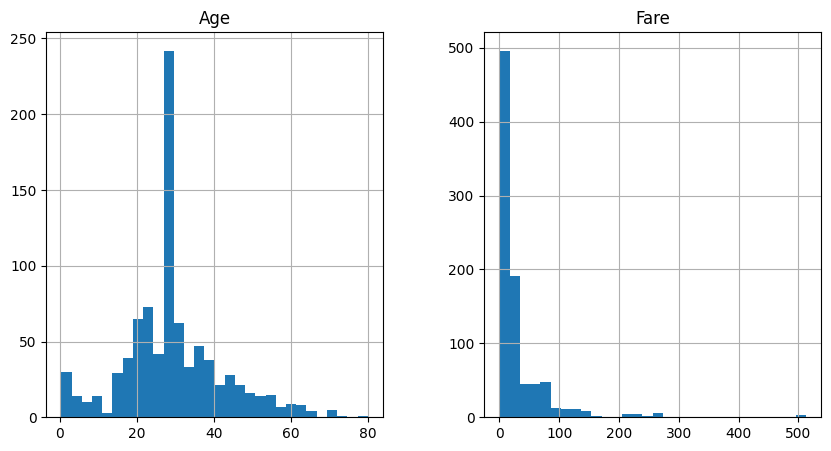

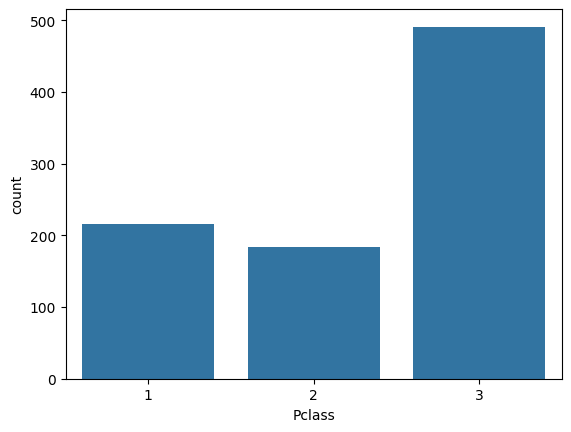

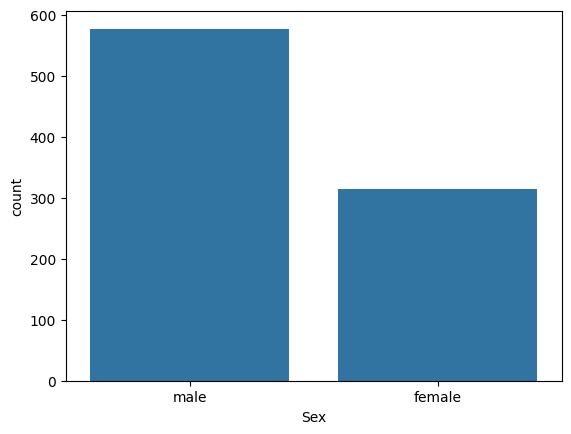

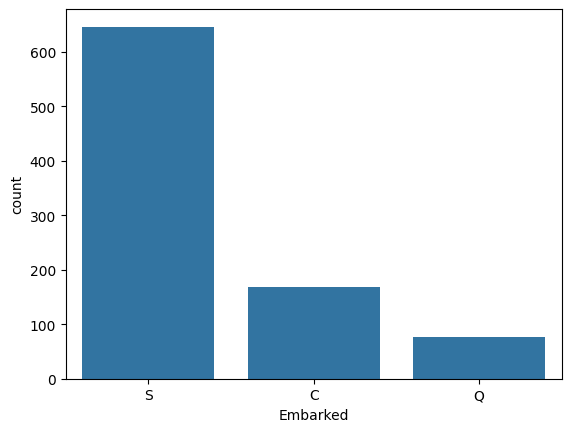

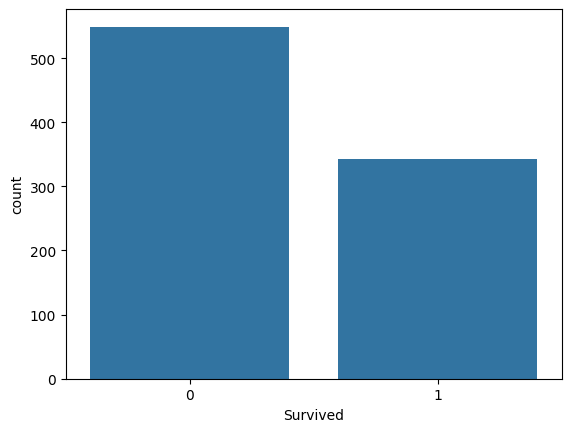

In [11]:
# Univariate Analysis
# Distribution of numerical features
numerical_features = ['Age', 'Fare']
titanic_data[numerical_features].hist(bins=30, figsize=(10, 5))
plt.show()

# Count of categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Survived']
for feature in categorical_features:
    sns.countplot(x=feature, data=titanic_data)
    plt.show()

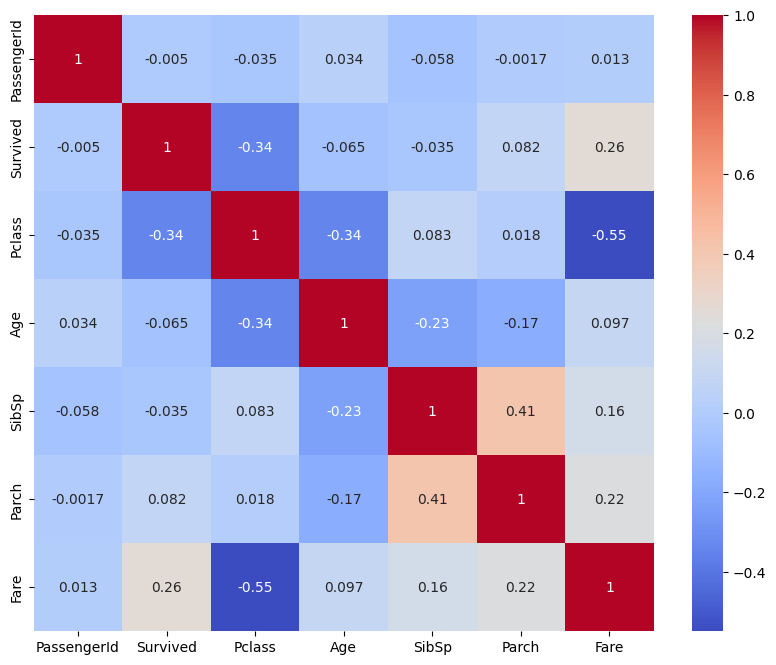

In [14]:
#Bivariate
# Select only numerical columns for correlation matrix
numerical_cols = titanic_data.select_dtypes(include=['number']).columns
corr_matrix = titanic_data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

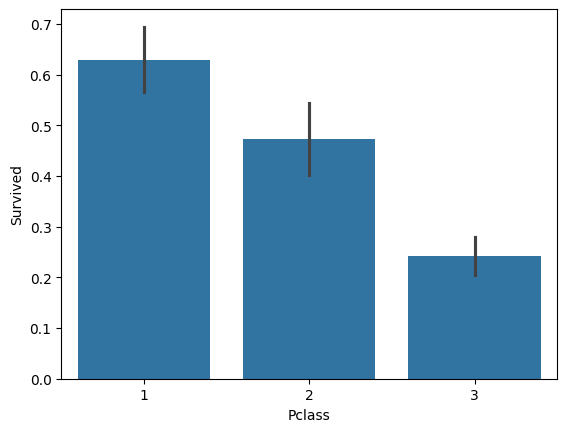

In [15]:
# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.show()

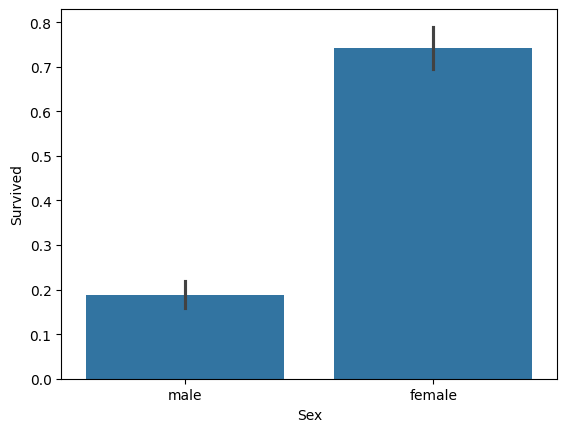

In [16]:
# Survival rate by sex
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.show()

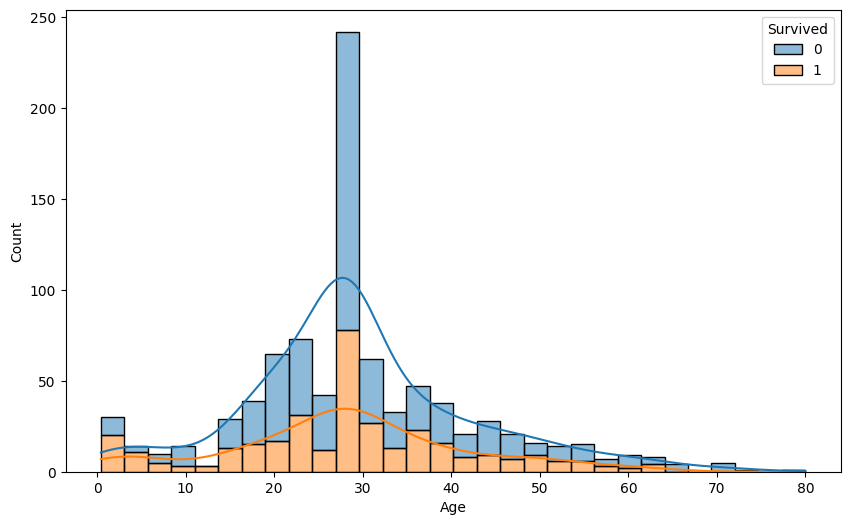

In [17]:
# Survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.show()

In [18]:
# Step 5: Save Cleaned Data
cleaned_file_path = '/content/cleaned_titanic_data.csv'
titanic_data.to_csv(cleaned_file_path, index=False)

print("Data cleaning and EDA completed. Cleaned dataset saved to:", cleaned_file_path)

Data cleaning and EDA completed. Cleaned dataset saved to: /content/cleaned_titanic_data.csv
